#### Running the BE solver using Scipy's ivp_solve

In [1]:
import solver

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lin

In [2]:
x_span = (0.01,20)
y_span = (0.01,20)

y_steps = 100



scattering_data = solver.BE_solver(x_span,y_span,y_steps, interaction_strength=0.15,collisions="scattering")
annihilation_data = solver.BE_solver(x_span,y_span,y_steps, interaction_strength=0.15,collisions="annihilation")
both_data = solver.BE_solver(x_span,y_span,y_steps, interaction_strength=0.15,collisions="both")

len(fs[5]) 80
len(xs) 80
len(fs[5]) 34
len(xs) 34
len(fs[5]) 80
len(xs) 80


In [3]:
xs_scattering = scattering_data[0]
fs_scattering = scattering_data[1]

xs_annihilation = annihilation_data[0]
fs_annihilation = annihilation_data[1]

xs_both = both_data[0]
fs_both = both_data[1]

ys = scattering_data[2]


print("Number of x-points for scattering =",len(xs_scattering))
print("Number of x-points for annihilation =",len(fs_annihilation[1]))
print("Number of x-points for both =",len(xs_both))
print(xs_scattering[28])
print(xs_annihilation[10])

n_dot = scattering_data[3]
E_dot = scattering_data[4]

Number of x-points for scattering = 80
Number of x-points for annihilation = 34
Number of x-points for both = 80
0.2269172070441547
0.3275590076699142


In [4]:
# distribution function for scattering, annihilation and both at x = 0.15
f_scattering = [fs_scattering[i][28] for i in range(len(ys))]
f_annihilation = [fs_annihilation[i][10] for i in range(len(ys))]
f_both = [fs_both[i][30] for i in range(len(ys))]


f_scattering_eq = [fs_scattering[i][0] for i in range(len(ys))]
f_scattering_050 = [fs_scattering[i][20] for i in range(len(ys))]
f_scattering_100 = [fs_scattering[i][40] for i in range(len(ys))]
f_scattering_200 = [fs_scattering[i][70] for i in range(len(ys))]

f_annihilation_eq = [fs_annihilation[i][0] for i in range(len(ys))]
f_annihilation_050 = [fs_annihilation[i][10] for i in range(len(ys))]
f_annihilation_100 = [fs_annihilation[i][20] for i in range(len(ys))]
f_annihilation_200 = [fs_annihilation[i][30] for i in range(len(ys))]

f_both_eq = [fs_both[i][0] for i in range(len(ys))]
f_both_050 = [fs_both[i][20] for i in range(len(ys))]
f_both_100 = [fs_both[i][40] for i in range(len(ys))]
f_both_200 = [fs_both[i][70] for i in range(len(ys))]

Text(0, 0.5, 'f(y,x)')

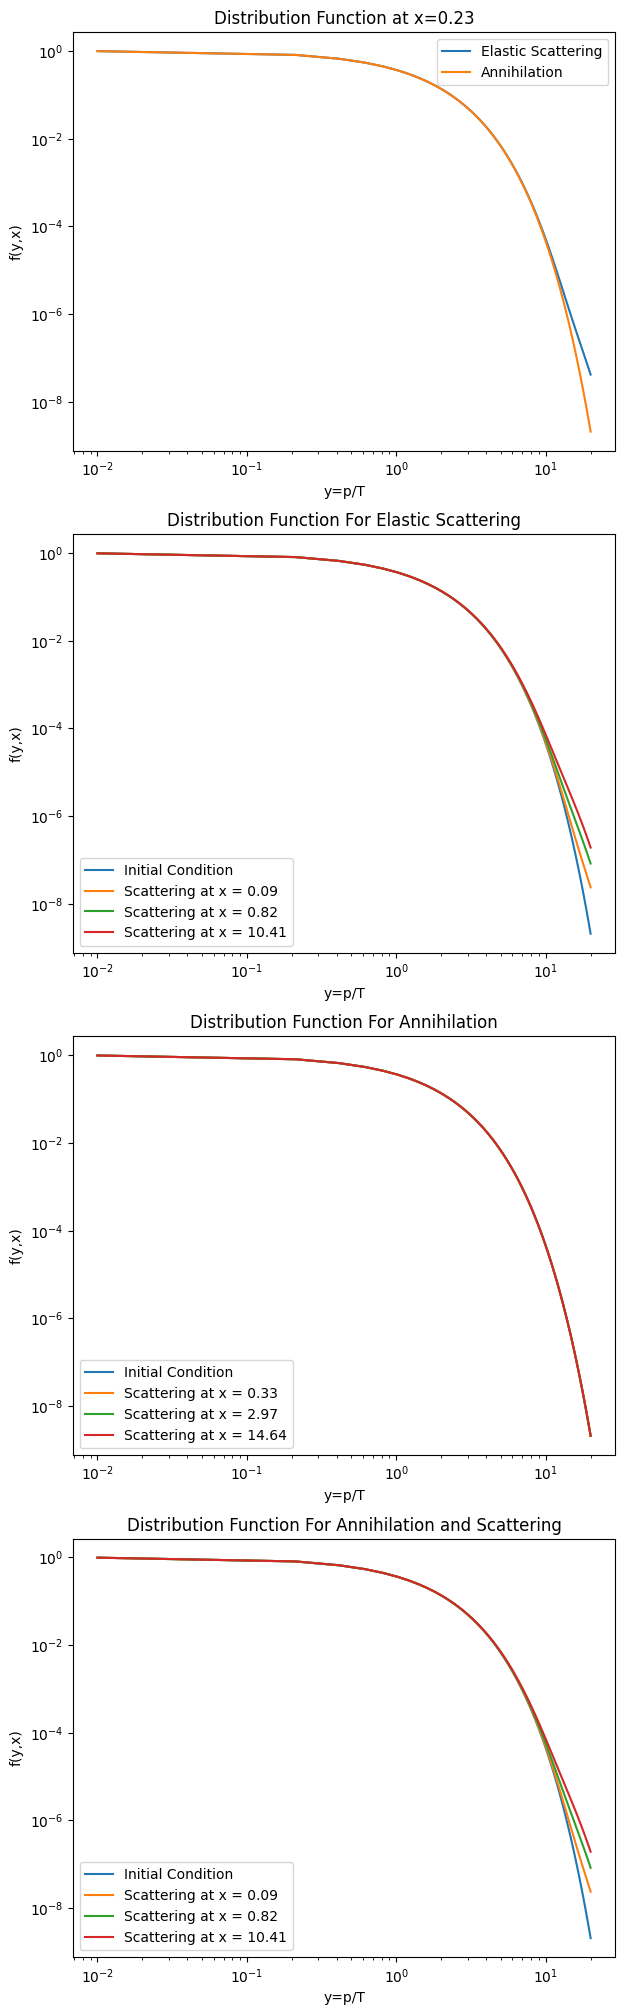

In [5]:
fig, axs = plt.subplots(4,figsize=(7,25))

axs[0].loglog(ys,f_scattering, label = "Elastic Scattering")
axs[0].loglog(ys,f_annihilation, label = "Annihilation")
# axs[0].loglog(ys,f_both, label = "Elastic Scattering + Annihilation")

axs[0].legend()
axs[0].set_title(f"Distribution Function at x={xs_scattering[28]:.02f}")
axs[0].set_xlabel("y=p/T")
axs[0].set_ylabel("f(y,x)")


axs[1].loglog(ys,f_scattering_eq, label = "Initial Condition")
axs[1].loglog(ys,f_scattering_050, label = f"Scattering at x = {xs_scattering[20]:.02f}")
axs[1].loglog(ys,f_scattering_100, label = f"Scattering at x = {xs_scattering[40]:.02f}")
axs[1].loglog(ys,f_scattering_200, label = f"Scattering at x = {xs_scattering[70]:.02f}")

axs[1].legend()
axs[1].set_title(f"Distribution Function For Elastic Scattering")
axs[1].set_xlabel("y=p/T")
axs[1].set_ylabel("f(y,x)")


axs[2].loglog(ys,f_annihilation_eq, label = "Initial Condition")
axs[2].loglog(ys,f_annihilation_050, label = f"Scattering at x = {xs_annihilation[10]:.02f}")
axs[2].loglog(ys,f_annihilation_100, label = f"Scattering at x = {xs_annihilation[20]:.02f}")
axs[2].loglog(ys,f_annihilation_200, label = f"Scattering at x = {xs_annihilation[30]:.02f}")

axs[2].legend()
axs[2].set_title(f"Distribution Function For Annihilation")
axs[2].set_xlabel("y=p/T")
axs[2].set_ylabel("f(y,x)")


axs[3].loglog(ys,f_both_eq, label = "Initial Condition")
axs[3].loglog(ys,f_both_050, label = f"Scattering at x = {xs_both[20]:.02f}")
axs[3].loglog(ys,f_both_100, label = f"Scattering at x = {xs_both[40]:.02f}")
axs[3].loglog(ys,f_both_200, label = f"Scattering at x = {xs_both[70]:.02f}")

axs[3].legend()
axs[3].set_title(f"Distribution Function For Annihilation and Scattering")
axs[3].set_xlabel("y=p/T")
axs[3].set_ylabel("f(y,x)")

In [6]:
print(len(n_dot))
print(len(E_dot))

print(n_dot)
print(E_dot)

0
0
[]
[]
